In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.models import Model, Sequential
from keras.layers import *
from keras.optimizers import Adam

import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [4]:
#Importing Data available in keras library 
from keras.datasets import mnist
(train_data,train_targets),(test_data,test_targets)= mnist.load_data()

11493376/11490434 [==============================] - 42s 4us/step


In [6]:
train_data.shape

(60000, 28, 28)

In [7]:
test_data.shape

(10000, 28, 28)

In [8]:
#First image looks like when we converst into array
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
train_data = train_data.reshape(60000,784)

In [10]:
test_data = test_data.reshape(10000,784)

In [11]:
train_data = train_data.astype('float32')

In [12]:
test_data = test_data.astype('float32')

In [13]:
train_data /= 255

In [15]:
test_data /= 255

In [18]:
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [20]:
n_classes = 10

y_train = keras.utils.to_categorical(train_targets, n_classes)
y_test = keras.utils.to_categorical(test_targets, n_classes)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

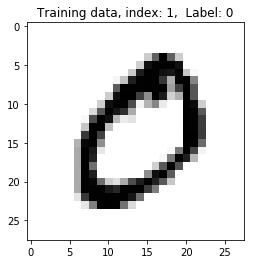

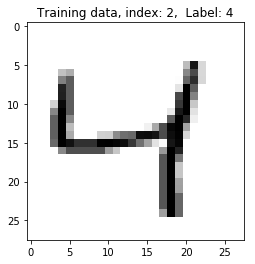

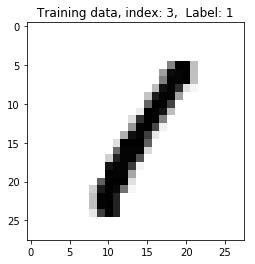

In [21]:
# now we will display the number

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = train_data[index].reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
def show_predicted_digit(image, pred, label):
    # Reshape 784 array into 28x28 image
    image = image.reshape([28,28])
    plt.title('Original Image, Pred: %d,  True Label: %d' %(pred, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
show_digit(1)
show_digit(2)
show_digit(3)

In [52]:
# Training Parameters for basic MNIST
learning_rate = 0.01 
training_epochs = 10
batch_size = 100

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28 flattened to be 784)
n_hidden_1 = 184 # 1st layer number of neurons
n_hidden_2 = 288 # 2nd layer number of neurons
n_classes = 10 # MNIST classes for prediction(digits 0-9 )

In [53]:
model = Sequential()
model.add(Dense(n_hidden_1,  input_shape=(n_input,), name = "Dense_1"))
model.add(Activation('relu', name = "Relu1"))
model.add(Dense(n_hidden_2, name = "Dense_2"))
model.add(Activation('relu', name = "Relu2"))
model.add(Dense(n_classes, name = "Output"))
model.add(Activation('softmax', name = "Softmax_output"))

In [54]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 184)               144440    
_________________________________________________________________
Relu1 (Activation)           (None, 184)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 288)               53280     
_________________________________________________________________
Relu2 (Activation)           (None, 288)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                2890      
_________________________________________________________________
Softmax_output (Activation)  (None, 10)                0         
Total params: 200,610
Trainable params: 200,610
Non-trainable params: 0
_________________________________________________________________


In [36]:
#Lets calculate the the parameters
#layer 1 = (184 units 784 weights) + (184 units 1 bias) = 301,440

#layer 2 = (288 units 184 weights) + (288 units 1 bias) = 38,500

#layer 3 = (10 units 288) +(10 units bias)

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [56]:
history = model.fit(train_data,y_train,
                    batch_size=batch_size,
                    epochs=training_epochs,
                    verbose=1,
                    validation_data=(test_data, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 258us/step - loss: 1.0757 - acc: 0.7458 - val_loss: 0.4941 - val_acc: 0.8727
Epoch 2/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.4300 - acc: 0.8841 - val_loss: 0.3568 - val_acc: 0.9007
Epoch 3/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.3490 - acc: 0.9017 - val_loss: 0.3086 - val_acc: 0.9148
Epoch 4/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.3109 - acc: 0.9112 - val_loss: 0.2822 - val_acc: 0.9212
Epoch 5/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.2854 - acc: 0.9179 - val_loss: 0.2642 - val_acc: 0.9262
Epoch 6/10
60000/60000 [==============================] - 13s 213us/step - loss: 0.2653 - acc: 0.9235 - val_loss: 0.2457 - val_acc: 0.9311
Epoch 7/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.2490 - acc: 0.9289 - val_loss: 0.